In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('/content/Student_performance.csv')
print(data.head())
data.info()

   GPA  Extracurriculars  Parental_Income  Study_Hours  Entrance_Score  \
0  9.1                 3           950000           10            89.2   
1  8.7                 2           820000            8            85.4   
2  8.4                 4           780000            9            87.8   
3  9.3                 2           910000           11            92.3   
4  9.0                 3          1000000           10            88.5   

   Distance Internet Final_Grade  
0       5.3      Yes           A  
1       8.1      Yes           A  
2       6.7      Yes           A  
3       7.5      Yes           A  
4       4.2      Yes           A  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   GPA               135 non-null    float64
 1   Extracurriculars  135 non-null    int64  
 2   Parental_Income   135 non-null    int64  
 3   S

In [ ]:
X = data.drop('Final_Grade', axis=1)
y = data['Final_Grade']

In [ ]:
categorical_features = ['Internet']
numerical_features = ['GPA', 'Extracurriculars', 'Parental_Income', 'Study_Hours', 'Entrance_Score', 'Distance']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['GPA', 'Extracurriculars',
                                                   'Parental_Income',
                                                   'Study_Hours',
                                                   'Entrance_Score',
                                                   'Distance']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Internet'])])),
                ('classifier', DecisionTreeClassifier(random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
y_pred = model.predict(X_test)
print(y_pred[:10])


['B' 'B' 'C' 'C' 'A' 'B' 'B' 'C' 'B' 'A']


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the Decision Tree Classifier: {accuracy:.2f}")


Accuracy of the Decision Tree Classifier: 0.81


In [ ]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           A       0.88      0.88      0.88         8
           B       0.75      0.75      0.75         8
           C       0.83      0.71      0.77         7
           D       0.80      1.00      0.89         4

    accuracy                           0.81        27
   macro avg       0.81      0.83      0.82        27
weighted avg       0.82      0.81      0.81        27



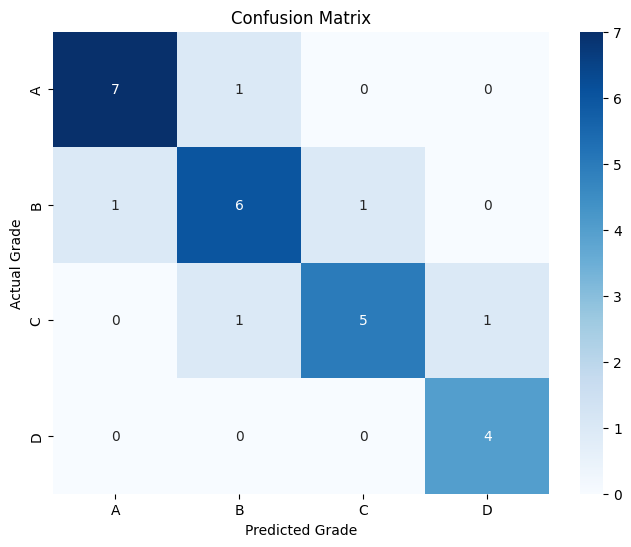

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Grade')
plt.ylabel('Actual Grade')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def predict_grade(gpa, extracurriculars, parental_income, study_hours, entrance_score, distance, internet):
    """Predicts the final grade for a new student."""
    new_data = pd.DataFrame({
        'GPA': [gpa],
        'Extracurriculars': [extracurriculars],
        'Parental_Income': [parental_income],
        'Study_Hours': [study_hours],
        'Entrance_Score': [entrance_score],
        'Distance': [distance],
        'Internet': [internet]
    })
    predicted_grade = model.predict(new_data)[0]
    return predicted_grade

print("\n--- Example Predictions ---")
print(f"Prediction for student 1: {predict_grade(9.0, 3, 900000, 15, 91, 6, 'Yes')}")
print(f"Prediction for student 2: {predict_grade(7.0, 1, 350000, 5, 66, 10, 'No')}")
print(f"Prediction for student 3: {predict_grade(8.5, 2, 700000, 20, 82, 3, 'Yes')}")


--- Example Predictions ---
Prediction for student 1: A
Prediction for student 2: C
Prediction for student 3: B
